# Milestone 2

# Introduction

Nama: Arnaz Tejakusuma

Batch: 012

APP URL: https://arnaz-deployment-frontend.herokuapp.com

# World Happiness Report

Studi kasus yang digunakan untuk project kali ini adalah World Happiness Report. Di Indonesia, World Happiness Report mungkin lebih banyak dikenal dengan istilah Indeks Kebahagiaan Dunia. Laporan ini pertama kali dirilis oleh United Nations Sustainable Development Solutions Network (UNSDSN) bertepatan dengan International Day of Happiness pada tanggal 20 Maret 2012. Sejak saat itu, laporan ini terus dirilis oleh UNSDSN setiap tahunnya. Dalam pengerjaan laporan ini, UNSDSN bekerja sama dengan Gallup, Inc yang merupakan sebuah lembaga survei terkemuka.

Dalam laporan ini, negara-negara di seluruh dunia diranking berdasarkan tingkat kebahagiaan penduduknya. Dalam melakukan penilaian, ada beberapa faktor yang dianggap dapat mempengaruhi tingkat kebahagiaan masyarakat di suatu negara, antara lain:

- GDP per capita: besarnya pendapatan rata-rata penduduk di suatu negara

- Social support: berkaitan dengan ketersediaan support system. Misalnya, apakah seseorang akan mendapatkan pertolongan dari keluarga, kerabat, atau teman ketika mengalami kesulitan. 

- Life expectancy: angka harapan hidup

- Freedom to make life choices: berkaitan dengan kebebasan seseorang untuk mengekspresikan diri dan menyatakan pendapat pribadi di muka umum.

- Generosity: berkaitan dengan amal atau donasi seseorang. Karena ada anggapan bahwa orang yang rajin berdonasi biasanya lebih bahagia, terlebih lagi jika donasi tersebut dilakukan dengan sukarela dan tanpa paksaan.

- Perceptions of corruptions: tingkat kepercayaan masyarakat terhadap pemerintah dalam hal penanganan korupsi. Atau bagaimana masyarakat menilai situasi korupsi di negara mereka baik dalam pemerintahan atau lingkungan bisnis secara umum. 

Laporan ini merupakan laporan yang esensial, karena keenam faktor yang menjadi penenentu dalam laporan ini dapat digunakan untuk menilai tingkat keberhasilan dari pembangunan yang dilakukan oleh pemerintah. Selain itu, laporan ini juga dapat digunakan oleh pengambil keputusan sebagai bahan pertimbangan untuk membuat atau mempertajam kebijakan publik dengan tujuan meningkatkan kesejahtaraan masyarakat.

Rentang nilai yang dapat diperoleh sebuah negara adalah 0-10. Dimana 0 merupakan nilai terendah dan 10 merupakan nilai tertinggi. Berdasarkan hasil laporan 5 tahun terakhir, Finlandia yang merupakan negara yang paling bahagia di dunia. Sebagai gambaran, Indonesia menduduki peringkat ke-87. Tepat berada ditengah-tengah, artinya Indonesia memang bukan merupakan negara yang paling tidak bahagia, namun tentunya masih banyak yang harus dilakukan oleh pemerintah atau pengambil keputusan untuk meningatkan kebahagiaan dan kesejahtaraan masyarakat secara umum.

Sumber: https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf, https://www.bloomberg.com/news/articles/2022-03-18/world-s-happiest-ranking-goes-to-finland-for-fifth-year-in-a-row, https://www.cnbcindonesia.com/lifestyle/20220321113046-33-324483/indonesia-no-87-dalam-daftar-negara-paling-bahagia-di-dunia

# Dataset Description

Dataset yang digunakan dalam project ini adalah World Happiness Report tahun 2019. Dataset ini berisi ranking dari 156 negara yang disurvei pada tahun 2019. Beserta kolom-kolom seperti 'GDP', 'Social_support', 'Life_expectancy', 'Generosity', dan 'Corruption' yang menjadi penentu tinggi atau rendahnya 'Score' sebuah negara dalam laporan tersebut. Dataset ini dipublish sendiri oleh UNSDSN di Kaggle dengan link sebagai berikut: https://www.kaggle.com/datasets/unsdsn/world-happiness

# Objectives

Project ini merupakan Milestone 2 di Fase 1 Program FTDS untuk mengevaluasi pemahaman mengenai materi machine learning. Dalam project ini, main objectives-nya adalah memprediksi 'Score' dari suatu negara berkaitan dengan tingkat kebahagiaan penduduknya. Prediksi akan dilakukan dengan konsep regression. Dalam pengerjaan project ini, akan dibuat model Linear Regression dan Polynomial Regression. Kedua model akan dibandingkan untuk melihat model mana yang memiliki performa lebih baik dalam memprediksi 'Score' negara-negara yang masuk dalam dataset inference. 

# Import Libraries

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import plotly.offline as py
import plotly.express as px
import pickle

# Data Loading

In [58]:
# Loading dataset
df_ori = pd.read_csv('h8dsft_P1M2_Arnaz_Tejakusuma.csv')

In [59]:
# Membuat copy dari dataset agar dataset asli tetap utuh dan dapat dicek sewaktu-waktu
df_copy = df_ori.copy()

# Menampilkan Dataset

In [60]:
# Mengganti display setting dari dataset agar tidak ada kolom yang terpotong
pd.set_option('display.max.columns', None)

In [61]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris awal dari dataset
df_copy.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [62]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris akhir dari dataset
df_copy.tail(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [63]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris secara acak dari dataset
df_copy.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
133,134,Ethiopia,4.286,0.336,1.033,0.532,0.344,0.209,0.100
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162
131,132,Chad,4.350,0.350,0.766,0.192,0.174,0.198,0.078
30,31,Panama,6.321,1.149,1.442,0.910,0.516,0.109,0.054
138,139,Togo,4.085,0.275,0.572,0.410,0.293,0.177,0.085


In [64]:
# Mengganti nama kolom agar lebih mudah saat pengerjaan coding
df_copy.rename(columns = {'Overall rank':'Rank', 'Country or region':'Country', 'GDP per capita': 'GDP', 'Social support': 'Social_support', 'Healthy life expectancy': 'Life_expectancy', 'Freedom to make life choices':'Freedom', 'Perceptions of corruption': 'Corruption'}, inplace = True)

# Preview Dataset

In [9]:
# Memastikan total jumlah baris dan kolom dari dataset
df_copy.shape

(156, 9)

Dataset terdiri ini terdiri dari:

- 156 baris
- 9 kolom

In [10]:
# Memeriksa tipe data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             156 non-null    int64  
 1   Country          156 non-null    object 
 2   Score            156 non-null    float64
 3   GDP              156 non-null    float64
 4   Social_support   156 non-null    float64
 5   Life_expectancy  156 non-null    float64
 6   Freedom          156 non-null    float64
 7   Generosity       156 non-null    float64
 8   Corruption       156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [11]:
# Memastikan kolom yang memiliki entry null
df_copy.isnull().sum()

Rank               0
Country            0
Score              0
GDP                0
Social_support     0
Life_expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64

Berdasarkan pengamatan singkat, dataset ini:
- Terdiri dari 7 kolom bertipe float, 1 kolom bertipe object, dan 1 kolom bertipe integer.
- Tidak ditemukan missing value dalam dataset ini.

In [12]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social_support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Life_expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


Berdasarkan pengamatan singkat, tidak terdapat entry dengan value anomali dalam dataset ini.

# Exploratory Data Analysis (EDA)

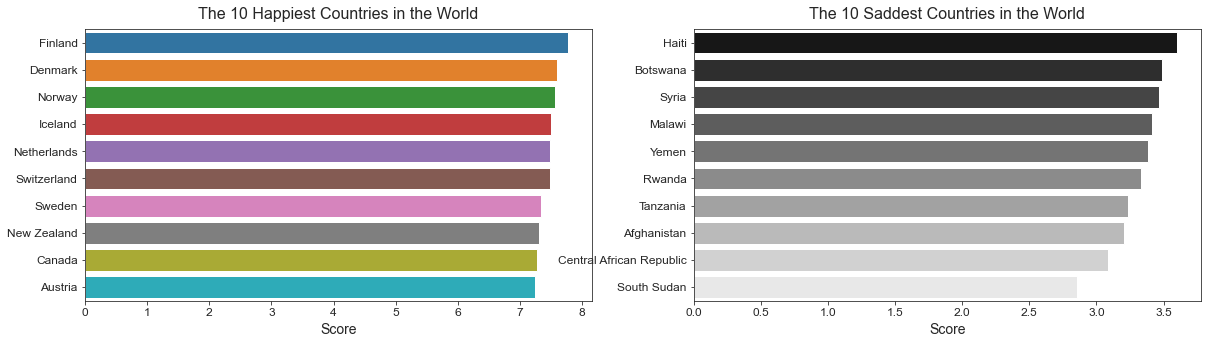

In [129]:
plt.figure(figsize = (20,5))
plt.subplot (1,2,1)
ax = sns.barplot(x='Score', y='Country', data=df_copy.head(10), palette=None)
plt.title("The 10 Happiest Countries in the World", fontsize = 16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
plt.subplot(1,2,2)
ax = sns.barplot(x='Score', y='Country', data=df_copy.tail(10), palette='gray')
plt.title("The 10 Saddest Countries in the World", fontsize = 16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
plt.show()

Finlandia telah menempati urutan pertama sebagai negara paling bahagia di dunia selama 5 tahun terakhir. Namun bagaimana dengan negara-negara lain yang masuk dalam top 10? ternyata top 10 negara-negara paling bahagia di dunia seluruhnya berada di Eropa Barat, Skandinavia, atau Amerika Utara. Sebenarnya tidak ada yang mengejutkan dari negara-negara yang masuk dalam top 10 ini. Negara-negara tersebut merupakan negara yang sudah maju, memiliki pemerintahan berjalan dengan baik, dan memiliki fasilitas publik yang baik. Faktor-faktor ini tentunya memengaruhi tingkat kebahagiaan dari penduduknya. 

Sedangkan top 10 negara yang paling tidak bahagia di dunia ditempati oleh negara-negara yang berada di Timur Tengah dan Afrika. Seluruh negara yang ada dalam list ini sedang mengalami permasalahan yang kompleks. Syria, South Sudan, Afghanistan, dan Yemen misalnya sedang dilanda konflik atau perang yang berkepanjangan. Sedangkan negara-negara lain dalam list ini ada yang masuk dalam ketegori failed states atau memiliki tingkat kemiskinan yang sangat tinggi. 

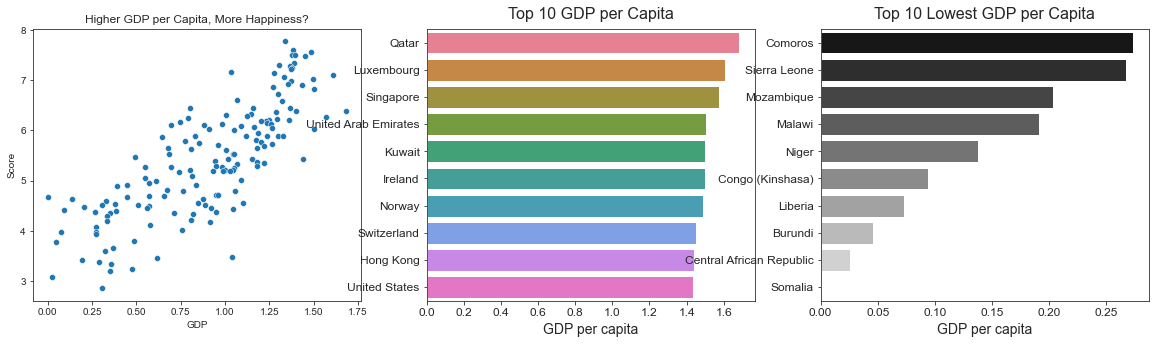

In [148]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='GDP', y='Score', data=df_copy, palette=None)
plt.title('Higher GDP per Capita, More Happiness?')
top10_GDP = df_copy.sort_values(by='GDP', ascending=False)
plt.subplot(1,3,2)
ax = sns.barplot(x='GDP', y='Country', data=top10_GDP.head(10), palette='husl')
plt.title("Top 10 GDP per Capita", fontsize = 16, pad=10)
ax.set_xlabel("GDP per capita", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
low10_GDP = df_copy.sort_values(by='GDP', ascending=False)
plt.subplot(1,3,3)
ax = sns.barplot(x='GDP', y='Country', data=low10_GDP.tail(10), palette='gray')
plt.title("Top 10 Lowest GDP per Capita", fontsize = 16, pad=10)
ax.set_xlabel("GDP per capita", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
plt.show()


Berdasarkan scatter plot yang terbentuk, ternyata 'Score' dan 'GDP' berkorelasi positif. Artinya, secara umum dapat disimpulkan bahwa semakin makmur sebuah negara, maka penduduknya akan cenderung lebih bahagia. Namun hal ini tentunya tidak dapat dijadikan satu-satunya patokan. Misalnya adalam kasus ini, Qatar merupakan negara dengan top 10 GDP per Capita tertinggi di dunia. Tetapi Qatar tidak masuk dalam top 10 negara yang paling bahagia. Faktor-faktor lain seperti 'Life_expectancy' atau 'Freedom' tentunya akan memiliki pengaruh juga. 

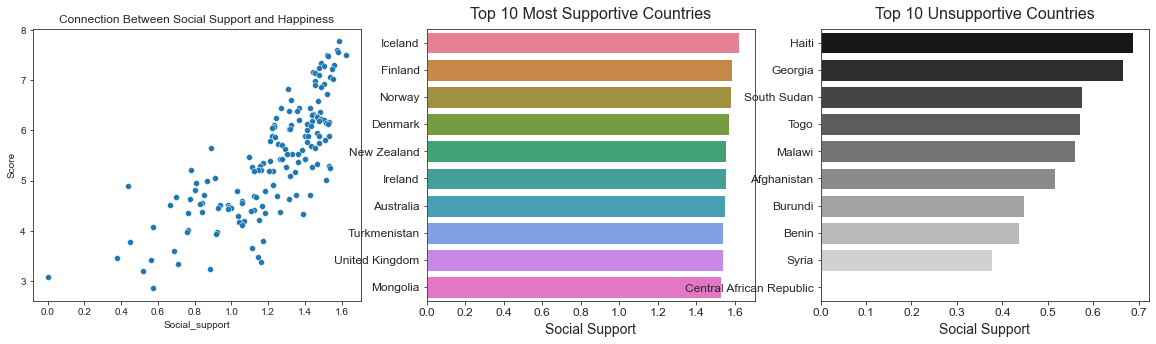

In [149]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='Social_support', y='Score', data=df_copy, palette=None)
plt.title('Connection Between Social Support and Happiness')
top10_SS = df_copy.sort_values(by='Social_support', ascending=False)
plt.subplot(1,3,2)
ax = sns.barplot(x='Social_support', y='Country', data=top10_SS.head(10), palette='husl')
plt.title("Top 10 Most Supportive Countries", fontsize = 16, pad=10)
ax.set_xlabel("Social Support", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
low10_SS = df_copy.sort_values(by='Social_support', ascending=False)
plt.subplot(1,3,3)
ax = sns.barplot(x='Social_support', y='Country', data=top10_SS.tail(10), palette='gray')
plt.title("Top 10 Unsupportive Countries", fontsize = 16, pad=10)
ax.set_xlabel("Social Support", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
plt.show()

Berdasarkan scatter plot yang terbentuk, dapat kita lihat bahwa adanya social support ternyata berkorelasi positif dengan tingkat kebahagiaan. Hal ini sepertinya mengkonfirmasi kodrat manusia sebagai makhluk sosial. Namun ada hal yang menarik dari top 10 tertinggi dan terendah dari kategori ini. Disini terlihat bahwa top 10 tertinggi ditempati oleh negara-negara maju yang makmur, sedangkan top 10 terendah ditempati oleh negara-negara yang dilanda konflik atau sangat miskin. Hal ini seperti memunculkan argumen bahwa seseorang harus makmur terlebih dahulu sebelum menolong atau peduli terhadap sesama. Sedangkan jika dalam keadaan sulit atau tidak menguntungkan, yang berlaku adalah prinsip survival of the fittest.

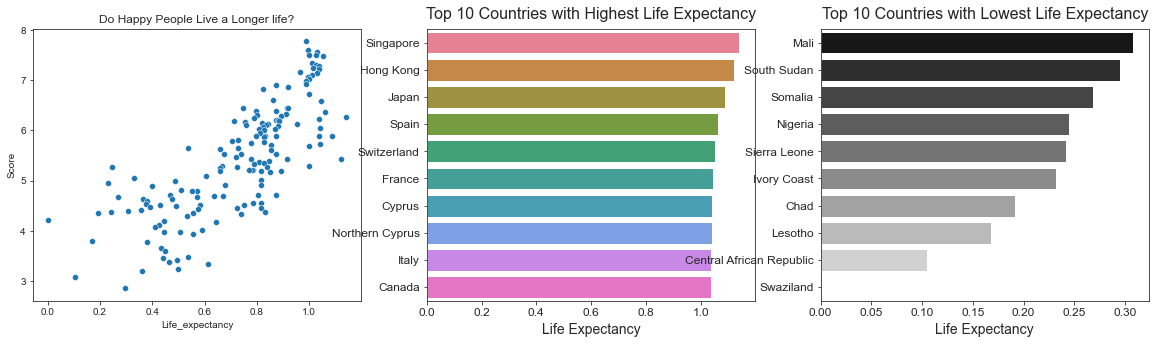

In [150]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='Life_expectancy', y='Score', data=df_copy, palette=None)
plt.title('Do Happy People Live a Longer life?')
top10_LE = df_copy.sort_values(by='Life_expectancy', ascending=False)
plt.subplot(1,3,2)
ax = sns.barplot(x='Life_expectancy', y='Country', data=top10_LE.head(10), palette='husl')
plt.title("Top 10 Countries with Highest Life Expectancy", fontsize = 16, pad=10)
ax.set_xlabel("Life Expectancy", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
low10_LE = df_copy.sort_values(by='Life_expectancy', ascending=False)
plt.subplot(1,3,3)
ax = sns.barplot(x='Life_expectancy', y='Country', data=low10_LE.tail(10), palette='gray')
plt.title("Top 10 Countries with Lowest Life Expectancy", fontsize = 16, pad=10)
ax.set_xlabel("Life Expectancy", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
plt.show()

Dari scatter plot diatas, secara umum kita dapat menyimpulkan bahwa 'Life_expectancy' berkorelasi positif dengan 'Score' artinya jika seseorang hidup bahagia, maka angka harapan hidupnya cenderung meningkat. Namun demikian, sama halnya dengan 'GDP', 'Life_expectancy' semata tidak dapat dijadikan satu-satunya faktor. Dari bar plot diatas terlihat bahwa Singapore dan Hong Kong merupakan negara-negara dengan angka harapan hidup tertinggi. Namun apakah Singapore dan Hong Kong merupakan negara paling bahagia? Ternyata tidak, Singapore bahkan hanya menempati urutan ke-34, sedangkan Hong Kong ada di urutan ke-76. Seperti yang kita ketahui, kedua negara tersebut merupakan negara yang kecil dan masyarakatnya sangat kompetitif. Hal ini tentunya berkaitan langsung dengan tingkat kebahagiaan penduduknya.

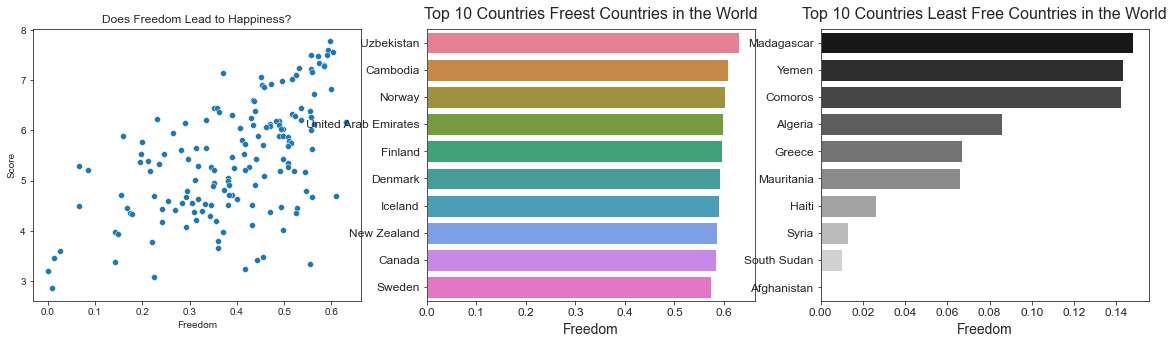

In [297]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='Freedom', y='Score', data=df_copy, palette=None)
plt.title('Does Freedom Lead to Happiness?')
top10_FR = df_copy.sort_values(by='Freedom', ascending=False)
plt.subplot(1,3,2)
ax = sns.barplot(x='Freedom', y='Country', data=top10_FR.head(10), palette='husl')
plt.title("Top 10 Countries Freest Countries in the World", fontsize = 16, pad=10)
ax.set_xlabel("Freedom", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
low10_FR = df_copy.sort_values(by='Freedom', ascending=False)
plt.subplot(1,3,3)
ax = sns.barplot(x='Freedom', y='Country', data=low10_FR.tail(10), palette='gray')
plt.title("Top 10 Countries Least Free Countries in the World", fontsize = 16, pad=10)
ax.set_xlabel("Freedom", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
plt.show()

Secara umum, kebebasan untuk mengkespresikan diri dan menyatakan pendapat di muka publik berkorelasi positif dengan tingkat kebahagiaan penduduk. Disini yang cukup menarik adalah negara yang menempati urutan tertinggi disini adalah Uzbekistan. Sebuah negara pecahan Soviet yang namanya jarang kita dengar dan masih tergolong negara berkembang. Lebih mengejutkannya lagi, secara keseluruhan urutan yang diduduki oleh Uzbekistan cukup tinggi, yakni peringkat ke-41.

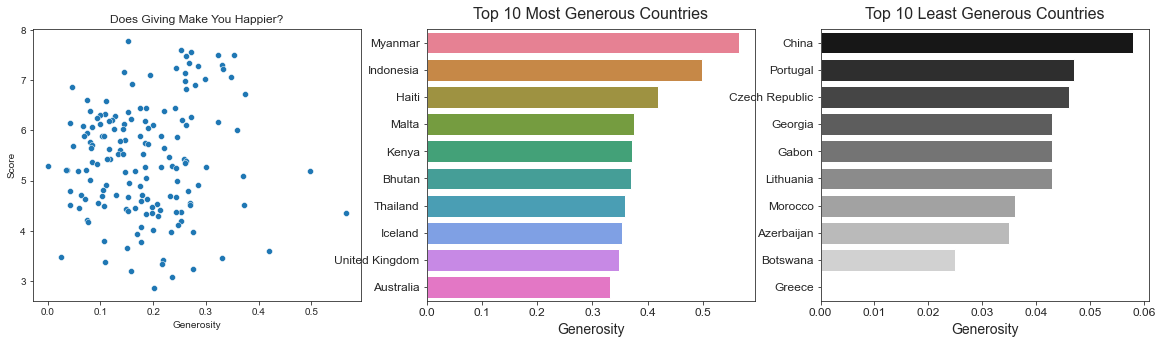

In [162]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='Generosity', y='Score', data=df_copy, palette=None)
plt.title('Does Giving Make You Happier?')
top10_GR = df_copy.sort_values(by='Generosity', ascending=False)
plt.subplot(1,3,2)
ax = sns.barplot(x='Generosity', y='Country', data=top10_GR.head(10), palette='husl')
plt.title("Top 10 Most Generous Countries", fontsize = 16, pad=10)
ax.set_xlabel("Generosity", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
low10_GR = df_copy.sort_values(by='Generosity', ascending=False)
plt.subplot(1,3,3)
ax = sns.barplot(x='Generosity', y='Country', data=low10_GR.tail(10), palette='gray')
plt.title("Top 10 Least Generous Countries", fontsize = 16, pad=10)
ax.set_xlabel("Generosity", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
plt.show()

Scatter plot yang terbentuk kurang bisa menggambarkan hubungan antara 'Generosity' dengan 'Score', namun demikian, yang paling menarik dari hasil penelusuran data disini tentunya adalah Indonesia yang menduduki peringkat atas dalam hal 'Generosity', selama ini orang Indonesia selalu dikenal sebagai orang-orang yang ramah dan tidak ragu untuk menolong orang lain. Tetapi yang tidak disangka adalah hal ini ternyata bukan sebuah ungkapan belaka, namun memiliki bukti tertulis dalam laporan sekredibel World Happiness Report. Menarik untuk dicari tahu lebih lanjut faktor apakah yang membuat orang Indonesia suka menolong orang lain. Mungkinkah hal ini berkaitan dengan nilai yang ditanamkan sejak dini seperti semangat untuk gotong royong? 

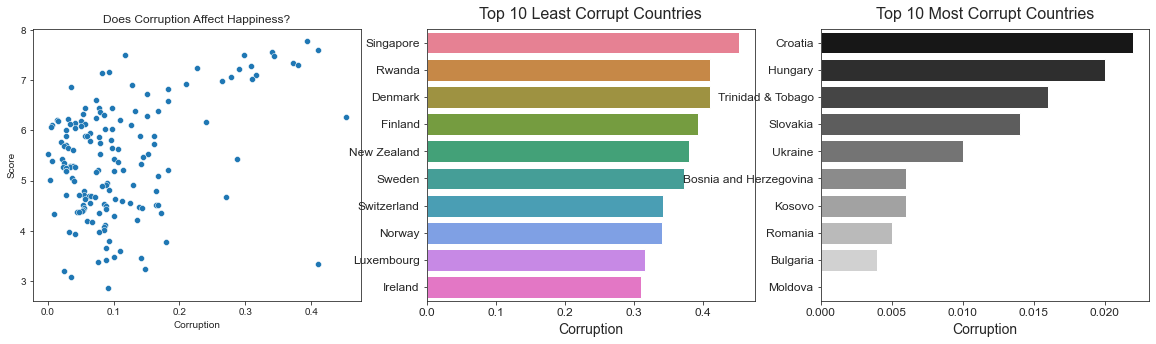

In [161]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='Corruption', y='Score', data=df_copy, palette=None)
plt.title('Does Corruption Affect Happiness?')
top10_CR = df_copy.sort_values(by='Corruption', ascending=False)
plt.subplot(1,3,2)
ax = sns.barplot(x='Corruption', y='Country', data=top10_CR.head(10), palette='husl')
plt.title("Top 10 Least Corrupt Countries", fontsize = 16, pad=10)
ax.set_xlabel("Corruption", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
low10_CR= df_copy.sort_values(by='Corruption', ascending=False)
plt.subplot(1,3,3)
ax = sns.barplot(x='Corruption', y='Country', data=low10_CR.tail(10), palette='gray')
plt.title("Top 10 Most Corrupt Countries", fontsize = 16, pad=10)
ax.set_xlabel("Corruption", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
plt.show()

Scatter plot disini tidak terlalu bisa menggambarkan hubungan antara 'Corruption' dengan 'Score', disini negara-negara yang paling tidak korup ditempati oleh negara-negara yang cukup familiar. Kita juga sudah sering mendengar bahwa Singapore merupakan negara dengan pemerintahan yang paling bersih di dunia. Yang menarik adalah Rwanda, dimana negara ini menduduki pertingkat kedua setelah Singapore, namun disaat yang bersamaan juga termasuk dalam top 10 negara yang paling tidak bahagia di dunia. Cukup menarik untuk mencari tahu apa yang terjadi di negara Rwanda. Karena jika mendengar kata Rwanda, kemungkinan hal pertama yang terlintas dalam pikiran kita adalah peristiwa Rwandan Genocide pada tahun 1994. 

# Data Preprocessing

In [13]:
# Membuat dataframe inference, mengambil 10 entry yang nantinya digunakan untuk menguji model yang dibuat
df_inf = df_copy.sample(10, random_state=17)
df_inf

,Rank,Country,Score,GDP,Social_support,Life_expectancy,Freedom,Generosity,Corruption
16,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
53,54,South Korea,5.895,1.301,1.219,1.036,0.159,0.175,0.056
55,56,Jamaica,5.890,0.831,1.478,0.831,0.490,0.107,0.028
77,78,Bosnia and Herzegovina,5.386,0.945,1.212,0.845,0.212,0.263,0.006
127,128,Mali,4.390,0.385,1.105,0.308,0.327,0.153,0.052
97,98,Ghana,4.996,0.611,0.868,0.486,0.381,0.245,0.040
104,105,Laos,4.796,0.764,1.030,0.551,0.547,0.266,0.164
113,114,Niger,4.628,0.138,0.774,0.366,0.318,0.188,0.102


In [14]:
# Mendrop data yang telah dipilih menjadi inference dari dataset
df_train = df_copy.drop(df_inf.index)
df_train

,Rank,Country,Score,GDP,Social_support,Life_expectancy,Freedom,Generosity,Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [15]:
# Mereset index agar tidak terjadi kesalahan yang disebabkan oleh index yang belum direset
df_train.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

# Membagi Dataset Menjadi X (feature) dan y (target)

In [16]:
# Membagi antara X(feature) dengan y(target)
X = df_train.drop('Score', axis=1)
y = df_train['Score']
X

,Rank,Country,GDP,Social_support,Life_expectancy,Freedom,Generosity,Corruption
0,1,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
141,151,Yemen,0.287,1.163,0.463,0.143,0.108,0.077
142,152,Rwanda,0.359,0.711,0.614,0.555,0.217,0.411
143,154,Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025
144,155,Central African Republic,0.026,0.000,0.105,0.225,0.235,0.035


In [17]:
# Membagi antara train dan test set, train set presentasenya adalah 80% dan test set presentasenya adalah 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train size:' , X_train.shape)
print('Test size:', X_test.shape)

Train size: (116, 8)
Test size: (30, 8)


# Feature Selection

<AxesSubplot:>

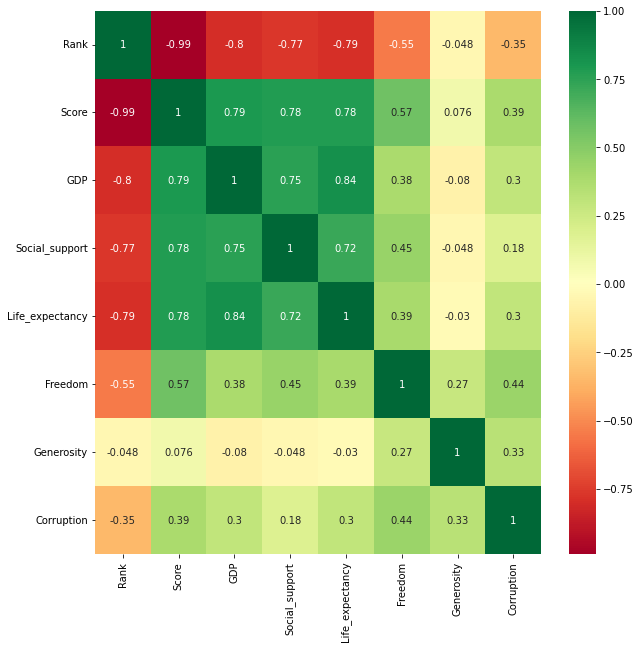

In [18]:
# Cek korelasi antara target dengan feature menggunakan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_copy.corr(), annot=True, cmap='RdYlGn')

Berdasarkan heatmap diatas, semua kategori numerikal yang dapat dijadikan feature memiliki hubungan dengan kolom target yaitu 'Score' 
Namun demikian yang dipilih menjadi feature adalah kolom yang dengan nilai korelasi yang tinggi yaitu 'GDP', 'Social_support', 'Life_expectancy', 'Freedom', dan 'Corruption' untuk kolom 'Generosity' tidak dipilih menjadi feature karena nilai korelasinya rendah, selain itu berdasarkan scatter plot di bagian EDA, terlihat bahwa tidak ada korelasi yang kuat antara 'Generosity' dengan 'Score'

In [173]:
# Membuat variabel yang berisikan kolom-kolom yang dipilih menjadi feature
X_train_fix = X_train[['GDP', 'Social_support', 'Life_expectancy', 'Freedom', 'Corruption']]
X_test_fix = X_test[['GDP', 'Social_support', 'Life_expectancy', 'Freedom', 'Corruption']]
X_train_fix

,GDP,Social_support,Life_expectancy,Freedom,Corruption
103,0.450,1.134,0.571,0.292,0.072
52,1.237,1.528,0.874,0.495,0.161
34,1.294,1.488,1.039,0.231,0.030
37,1.231,1.477,0.713,0.489,0.016
139,0.619,0.378,0.440,0.013,0.141
...,...,...,...,...,...
22,1.324,1.472,1.045,0.436,0.183
57,0.776,1.209,0.706,0.511,0.064
134,0.489,1.169,0.168,0.359,0.093
143,0.350,0.517,0.361,0.000,0.025


# Handling Missing Values

In [174]:
# Memeriksa missing value dalam train set
X_train_fix.isnull().sum()

GDP                0
Social_support     0
Life_expectancy    0
Freedom            0
Corruption         0
dtype: int64

In [175]:
# Memeriksa missing value dalam train set
y_train.isnull().sum()

0

In [176]:
# Memeriksa missing value dalam test set
X_test_fix.isnull().sum()

GDP                0
Social_support     0
Life_expectancy    0
Freedom            0
Corruption         0
dtype: int64

In [23]:
# Memeriksa missing value dalam test set
y_test.isnull().sum()

0

Tidak terdapat entry yang dengan value null dalam dataset ini. Dengan demikian kita dapat melanjutkan ke proses selanjutnya.

# Membagi Kolom Numerikal dan Kategorikal

In [260]:
# Membuat variabel yang berdasarkan tipe kolom
num_cols = X_train_fix.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train_fix.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_cols)
print('Categorical Columns : ', cat_cols)

Numerical Columns :  ['GDP', 'Social_support', 'Life_expectancy', 'Freedom', 'Corruption']
Categorical Columns :  []


In [261]:
# Membagi train dan test set berdasarkan tipe kolom
X_train_num = X_train_fix[num_cols]
X_train_cat = X_train_fix[cat_cols]

X_test_num = X_test_fix[num_cols]
X_test_cat = X_test_fix[cat_cols]

# Handling Outliers

Dalam dataset ini tidak akan dilakukan proses handling outliers. Tujuannya untuk menjaga kemurnian dataset, sehingga hasil prediksi yang dikeluarkan juga akan lebih tepat dan sesuai dengan keadaan di lapangan. Selain itu entry dalam dataset ini juga sangat sedikit, sehingga modifikasi data harus sangat diminimalisir.

# Feature Scaling

In [262]:
for i in X_train_num.columns:
    print(i, 'Skewness:', X_train_num[i].skew())

GDP Skewness: -0.4323999215008287
Social_support Skewness: -1.1384453442834197
Life_expectancy Skewness: -0.6573319484022595
Freedom Skewness: -0.7623725649556242
Corruption Skewness: 1.531998384494091


Menentukan skewness dataset untuk memilih scaler yang paling tepat untuk digunakan dalam proses scaling. Disini terlihat bahwa dataset bersifat skewed, sehingga scaler yang digunakan adalah MinMaxScaler. 

In [263]:
# Normalisasi menggunakan MinMaxScaler karena dataset bersifat skewed
scaler = MinMaxScaler()

# Fit hanya untuk train set
scaler.fit(X_train_num)

# Transfrom train dan test set
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.2672209 , 0.69827586, 0.50043821, 0.46275753, 0.15144766],
       [0.73456057, 0.9408867 , 0.76599474, 0.7844691 , 0.34966592],
       [0.76840855, 0.91625616, 0.91060473, 0.36608558, 0.05790646],
       [0.73099762, 0.90948276, 0.62489045, 0.77496038, 0.02672606],
       [0.3675772 , 0.23275862, 0.38562664, 0.02060222, 0.30512249],
       [0.62410926, 0.83805419, 0.76336547, 0.31220285, 0.16926503],
       [0.57007126, 0.83189655, 0.41104294, 0.61648177, 0.11358575],
       [0.72505938, 0.72105911, 0.72567923, 0.80507132, 0.04454343],
       [0.33372922, 0.57142857, 0.63365469, 0.83518225, 0.30957684],
       [0.56294537, 0.94273399, 0.58457493, 0.50237718, 0.07572383],
       [0.3260095 , 0.56034483, 0.29009641, 0.60380349, 0.07349666],
       [0.61817102, 0.70504926, 0.47151621, 0.72107765, 0.21380846],
       [0.32719715, 0.88546798, 0.63365469, 0.80507132, 0.04231626],
       [0.81235154, 0.88054187, 0.80105171, 0.5562599 , 0.20712695],
       [0.15914489, 0.51785714, 0.

In [264]:
# Concat numerical columns and cetegorical columns 
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis =1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis =1)
X_train_final


array([[0.2672209 , 0.69827586, 0.50043821, 0.46275753, 0.15144766],
       [0.73456057, 0.9408867 , 0.76599474, 0.7844691 , 0.34966592],
       [0.76840855, 0.91625616, 0.91060473, 0.36608558, 0.05790646],
       [0.73099762, 0.90948276, 0.62489045, 0.77496038, 0.02672606],
       [0.3675772 , 0.23275862, 0.38562664, 0.02060222, 0.30512249],
       [0.62410926, 0.83805419, 0.76336547, 0.31220285, 0.16926503],
       [0.57007126, 0.83189655, 0.41104294, 0.61648177, 0.11358575],
       [0.72505938, 0.72105911, 0.72567923, 0.80507132, 0.04454343],
       [0.33372922, 0.57142857, 0.63365469, 0.83518225, 0.30957684],
       [0.56294537, 0.94273399, 0.58457493, 0.50237718, 0.07572383],
       [0.3260095 , 0.56034483, 0.29009641, 0.60380349, 0.07349666],
       [0.61817102, 0.70504926, 0.47151621, 0.72107765, 0.21380846],
       [0.32719715, 0.88546798, 0.63365469, 0.80507132, 0.04231626],
       [0.81235154, 0.88054187, 0.80105171, 0.5562599 , 0.20712695],
       [0.15914489, 0.51785714, 0.

# Model definition

- Menggunakan algoritma Linear Regression, Polynomial Features 2, Polynomial Features 3. Ketiga algoritma akan diuji dan dibandingkan untuk kemudian dilihat algoritma mana yang performanya paling baik.

- Metrics yang akan dipakai untuk mengevaluasi adalah MAE dan MAPE untuk melihat jumlah dan presentase errornya, sedangkan r2score untuk melihat tingkat ketepatan.

# Model I (Linear Regression)

In [265]:
# Modelling
model_lin_reg = LinearRegression()

# Model Training
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [266]:
# Model Evaluation
# Predict against train-set and test-set
y_pred_train_I = model_lin_reg.predict(X_train_final)
y_pred_test_I = model_lin_reg.predict(X_test_final)

In [267]:
# Model Evaluation using MAE
print('Error - Train Set:', mean_absolute_error(y_train, y_pred_train_I))
print('Error - Test Set:', mean_absolute_error(y_test, y_pred_test_I))

Error - Train Set: 0.41321129819472086
Error - Test Set: 0.4499633231572574


In [268]:
# Model Evaluation using MAPE
print('Error - Train Set : ', mean_absolute_percentage_error(y_train, y_pred_train_I))
print('Error - Test Set  : ', mean_absolute_percentage_error(y_test, y_pred_test_I))

Error - Train Set :  0.08090700344738855
Error - Test Set  :  0.0940610975879448


In [269]:
# Model Evaluation using r2score
print('Score - train set : ', r2_score(y_train, y_pred_train_I))
print('Score - test set  : ', r2_score(y_test, y_pred_test_I))

Score - train set :  0.7725854350983213
Score - test set  :  0.7985314171795328


Hasil evaluasi Model I dengan Linear Regression biasa ternyata cukup baik. Berdasarkan r2score, model ini merupakan good fit karena score train set 0.77 dan test set 0.79. Jumlah error dalam MAPE dan MAE memang terlihat sangat tinggi. Namun hal ini tidak perlu dikhawatirkan, karena objectives dari project ini adalah memprediksi kolom 'Score' yang outputnya berupa bilangan desimal dengan jumlah angka di belakang koma yang sangat banyak. Sehingga tidak memungkinkan bagi model untuk memberikan output yang 100% sama. Selama modelnya masih good fit, artinya model tersebut masih dapat digunakan.

# Model II (Polynomial Regression Degree 2)

In [275]:
# Modelling
model_poly_2 = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Model training
model_poly_2.fit(X_train_final, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [276]:
# Model Evaluation
# Predict against train-set and test-set
y_pred_train_II = model_poly_2.predict(X_train_final)
y_pred_test_II = model_poly_2.predict(X_test_final)

In [277]:
# Model Evaluation using MAE
print('Error - Train Set:', mean_absolute_error(y_train, y_pred_train_II))
print('Error - Test Set:', mean_absolute_error(y_test, y_pred_test_II))

Error - Train Set: 0.32917975835647495
Error - Test Set: 0.42862959963086306


In [278]:
# Model Evaluation using MAPE
print('Error - Train Set : ', mean_absolute_percentage_error(y_train, y_pred_train_II))
print('Error - Test Set  : ', mean_absolute_percentage_error(y_test, y_pred_test_II))

Error - Train Set :  0.06422437852045351
Error - Test Set  :  0.09157500133851881


In [279]:
# Model Evaluation using r2score
print('Score - Train Set : ', r2_score(y_train, y_pred_train_II))
print('Score - Test Set  : ', r2_score(y_test, y_pred_test_II))

Score - Train Set :  0.8450861177824635
Score - Test Set  :  0.8047488846594234


Hasil evaluasi Model II dengan Polynomial Regression degree 2 ternyata cukup overfit. Berdasarkan r2score, terdapat perbedaan sekitar 4% antara train set yang mendapatkan 0.84 dengan test set yang mendapatkan 0.80. Memang perbedaan sekitar 4% tidak terlalu besar, namun menurut saya model ini tetap overfit.

Sama dengan Jumlah error dalam MAPE dan MAE Model I, model ini juga memiliki jumlah error dalam MAPE dan MAE yang sangat tinggi. Namun hal ini sebenarnya bukan masalah, karena objectives dari project ini adalah memprediksi kolom 'Score' yang outputnya berupa bilangan desimal dengan jumlah angka di belakang koma yang sangat banyak, tidak memungkinkan bagi model untuk mengeluarkan angka yang 100% sama. Namun demikian model ini tidak akan saya gunakan karena menurut saya model ini overfit.

# Model III (Polynomial Regression Degree 3)

In [280]:
# Modelling
model_poly_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())

# Model training
model_poly_3.fit(X_train_final, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [281]:
# Model Evaluation
# Predict against train-set and test-set
y_pred_train_III = model_poly_3.predict(X_train_final)
y_pred_test_III = model_poly_3.predict(X_test_final)

In [282]:
# Model Evaluation using MAE
print('Error - Train Set:', mean_absolute_error(y_train, y_pred_train_III))
print('Error - Test Set:', mean_absolute_error(y_test, y_pred_test_III))

Error - Train Set: 0.22439698949353445
Error - Test Set: 0.6383843749999999


In [283]:
# Model Evaluation using MAPE
print('Error - Train Set : ', mean_absolute_percentage_error(y_train, y_pred_train_III))
print('Error - Test Set  : ', mean_absolute_percentage_error(y_test, y_pred_test_III))

Error - Train Set :  0.041708435733627765
Error - Test Set  :  0.13567478368189317


In [284]:
# Model Evaluation using r2score
print('Score - Train Set : ', r2_score(y_train, y_pred_train_III))
print('Score - Test Set  : ', r2_score(y_test, y_pred_test_III))

Score - Train Set :  0.9255968259275015
Score - Test Set  :  0.5135443007548792


Hasil evaluasi Model III dengan Polynomial Regression degree 3 ternyata kurang baik, karena mengalami overfit yang cukup parah. Dimana score train set 0.92 sedangkan score test set hanya 0.51. Model ini tidak bisa digunakan karena hasil prediksi yang dikeluarkan pasti akan melenceng terlalu jauh. 

Karena Model II merupakan model dengan r2score tertinggi, maka model inilah yang akan digunakan untuk diuji dengan data inference.

# Grid Search

Untuk mendapatkan parameter terbaik dari sebuah model sebenarnya kita dapat melakukan tuning parameter dengan melakukan GridSearch. Namun karena model terbaik berdasarkan hasil hasil uji train dan test set adalah model I (Linear Regression), sepertinya tidak perlu melakukan proses GridSearch. Model Linear Regression tidak memiliki parameter yang dapat di tune, sehingga tidak dapat dilakukan proses GridSearch untuk model ini. Dengan demikian, model akan langsung diuji dengan dataset inference.

Sumber: https://stackoverflow.com/questions/60454618/is-it-possible-to-tune-the-linear-regression-hyperparameter-in-sklearn

# Model Testing

In [285]:
# menunjukan dataset inference
df_inf

,Rank,Country,Score,GDP,Social_support,Life_expectancy,Freedom,Generosity,Corruption
0,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265
1,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034
2,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
3,54,South Korea,5.895,1.301,1.219,1.036,0.159,0.175,0.056
4,56,Jamaica,5.890,0.831,1.478,0.831,0.490,0.107,0.028
5,78,Bosnia and Herzegovina,5.386,0.945,1.212,0.845,0.212,0.263,0.006
6,128,Mali,4.390,0.385,1.105,0.308,0.327,0.153,0.052
7,98,Ghana,4.996,0.611,0.868,0.486,0.381,0.245,0.040
8,105,Laos,4.796,0.764,1.030,0.551,0.547,0.266,0.164
9,114,Niger,4.628,0.138,0.774,0.366,0.318,0.188,0.102


In [286]:
# split numerical and categorial columns
df_inf_num = df_inf[num_cols]
df_inf_cat = df_inf[cat_cols]

In [287]:
# Feature scaling and encoding
df_inf_num_scaled = scaler.transform(df_inf_num)

In [288]:
# Concat columns
df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat], axis=1)
df_inf_final

array([[0.81532067, 0.8953202 , 0.86503067, 0.7844691 , 0.58129176],
       [0.70130641, 0.71182266, 0.87554777, 0.10618067, 0.06681514],
       [0.28266033, 0.54495074, 0.43733567, 0.66085578, 0.31848552],
       [0.77256532, 0.75061576, 0.90797546, 0.25198098, 0.11581292],
       [0.49346793, 0.91009852, 0.7283085 , 0.77654517, 0.05345212],
       [0.5611639 , 0.74630542, 0.74057844, 0.33597464, 0.00445434],
       [0.22862233, 0.68041872, 0.26993865, 0.51822504, 0.10690423],
       [0.3628266 , 0.53448276, 0.42594216, 0.60380349, 0.08017817],
       [0.45368171, 0.63423645, 0.48290973, 0.86687797, 0.35634744],
       [0.08194774, 0.47660099, 0.32077125, 0.50396197, 0.21826281]])

In [289]:
# Prediksi menggunakan Model I (Linear Regression)
y_pred_inf = model_lin_reg.predict(df_inf_final)
y_pred_inf

array([6.5774725 , 5.26847757, 4.60552595, 5.6144163 , 5.8415461 ,
       5.20593823, 4.40053298, 4.51559347, 5.22994207, 3.92847836])

In [290]:
# Membentuk hasil prediksi menjadi sebuah dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Score - Prediction'])
y_pred_inf_df

,Score - Prediction
0,6.577472
1,5.268478
2,4.605526
3,5.614416
4,5.841546
5,5.205938
6,4.400533
7,4.515593
8,5.229942
9,3.928478


In [291]:
pd.concat([df_inf, y_pred_inf_df], axis =1)

,Rank,Country,Score,GDP,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Score - Prediction
0,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265,6.577472
1,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034,5.268478
2,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,4.605526
3,54,South Korea,5.895,1.301,1.219,1.036,0.159,0.175,0.056,5.614416
4,56,Jamaica,5.890,0.831,1.478,0.831,0.490,0.107,0.028,5.841546
5,78,Bosnia and Herzegovina,5.386,0.945,1.212,0.845,0.212,0.263,0.006,5.205938
6,128,Mali,4.390,0.385,1.105,0.308,0.327,0.153,0.052,4.400533
7,98,Ghana,4.996,0.611,0.868,0.486,0.381,0.245,0.040,4.515593
8,105,Laos,4.796,0.764,1.030,0.551,0.547,0.266,0.164,5.229942
9,114,Niger,4.628,0.138,0.774,0.366,0.318,0.188,0.102,3.928478


# Conclusion

# Save Model

In [295]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model_lin_reg, f)

In [296]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)